In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

### IGRINS data of ASASSN15qi

In [3]:
import h5py

## Actual data

You can have pandas read the clipboard if you copy the output from the terminal.  Saves a step of copying files over, at the expense of reproducibility...

In [4]:
import pandas as pd

In [5]:
sf_dat = pd.read_csv('../data/analysis/IGRINS_LkCa4_run02_last20kMCMC.csv')
sf_dat2 = pd.read_csv('../data/analysis/IGRINS_LkCa4_run01_last20kMCMC.csv')
sf_dat3 = pd.read_csv('../data/analysis/IGRINS_ESPaDOnS_run01_last10kMCMC.csv')
sf_dat4 = pd.read_csv('../data/analysis/IGRINS_mix_emcee_last200.csv')

In [6]:
! ls ../data/analysis/

ESPaDOnS_mixture_params.csv           optical_run01_by_order.csv
IGRINS_ESPaDOnS_run01_last10kMCMC.csv orders_LkCa4_oneTeff.csv
IGRINS_LkCa4_run01_last20kMCMC.csv    rat_BB_3300_4100.csv
IGRINS_LkCa4_run02_last20kMCMC.csv    rat_PHX_3300_4100.csv
IGRINS_mix_emcee_last200.csv          run01_by_order.csv
IGRINS_mixture_params.csv             run02_by_order.csv
V_at_obsEpoch.csv                     synthetic_run03_last10kMCMC.csv
latex_TeffOrder_table.csv


In [7]:
sf_dat4.columns

Index(['wl_start', 'wl_end', 'band', 'number', 'tell_trans', 'm_val',
       'wl_center', 'Teff_05p', 'Teff_50p', 'Teff_95p', 'logg_05p', 'logg_50p',
       'logg_95p', 'FeH_05p', 'FeH_50p', 'FeH_95p', 'vz_05p', 'vz_50p',
       'vz_95p', 'vi_05p', 'vi_50p', 'vi_95p', 'logO_05p', 'logO_50p',
       'logO_95p', 'c1_05p', 'c1_50p', 'c1_95p', 'c2_05p', 'c2_50p', 'c2_95p',
       'c3_05p', 'c3_50p', 'c3_95p', 'SA_05p', 'SA_50p', 'SA_95p', 'LA_05p',
       'LA_50p', 'LA_95p', 'll_05p', 'll_50p', 'll_95p', 'Teff2_05p',
       'Teff2_50p', 'Teff2_95p', 'logO2_05p', 'logO2_50p', 'logO2_95p',
       'ff_05p', 'ff_50p', 'ff_95p', 'inference'],
      dtype='object')

In [8]:
sf_dat4

,wl_start,wl_end,band,number,tell_trans,m_val,wl_center,Teff_05p,Teff_50p,Teff_95p,...,Teff2_05p,Teff2_50p,Teff2_95p,logO2_05p,logO2_50p,logO2_95p,ff_05p,ff_50p,ff_95p,inference
0,18092.0,18346.0,H,0,0.117487,98,18219.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17914.0,18165.0,H,1,0.342583,99,18039.5,3931.021262,4196.127470,4295.104192,...,3007.612092,3061.969155,3199.046408,NaN,NaN,NaN,0.709056,0.818038,0.871110,True
2,17739.0,17988.0,H,2,0.666035,100,17863.5,3924.922737,4221.269053,4293.039898,...,3001.564404,3033.193625,3118.474481,NaN,NaN,NaN,0.702850,0.777690,0.842168,True
3,17568.0,17815.0,H,3,0.827089,101,17691.5,3808.010328,4155.798016,4276.041452,...,3006.686455,3075.791225,3208.632792,NaN,NaN,NaN,0.704421,0.786773,0.869482,True
4,17400.0,17645.0,H,4,0.904758,102,17522.5,4037.643678,4240.880406,4294.305977,...,3001.559295,3025.211248,3082.416705,NaN,NaN,NaN,0.801685,0.840407,0.920849,True
5,17236.0,17478.0,H,5,0.916614,103,17357.0,3508.184572,3908.306373,4255.842102,...,3015.667323,3118.316169,3285.028739,NaN,NaN,NaN,0.517174,0.702691,0.859594,True
6,17075.0,17315.0,H,6,0.955115,104,17195.0,3892.023980,4178.952679,4290.724543,...,3002.128949,3029.551508,3106.483533,NaN,NaN,NaN,0.787142,0.840396,0.901001,True
7,16917.0,17155.0,H,7,0.971447,105,17036.0,3963.660349,4162.931631,4284.228348,...,3002.559314,3034.846766,3145.990129,NaN,NaN,NaN,0.669456,0.738134,0.813399,True
8,16762.0,16997.0,H,8,0.983494,106,16879.5,4062.837275,4261.308960,4298.073009,...,3003.338260,3065.575976,4142.322548,NaN,NaN,NaN,0.444787,0.714617,0.881600,True
9,16610.0,16843.0,H,9,0.981606,107,16726.5,3657.176386,4048.775489,4262.868207,...,3313.011950,3593.095596,3844.219632,NaN,NaN,NaN,0.383075,0.674639,0.835786,True


<Container object of 3 artists>

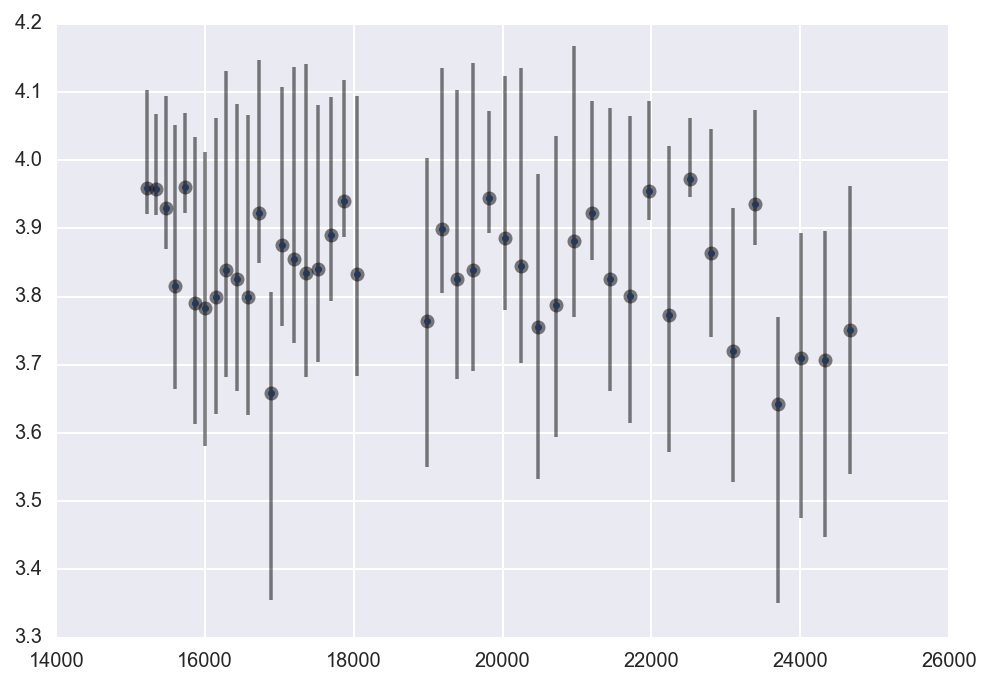

In [9]:
plt.plot(sf_dat4.wl_center, sf_dat4.logg_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.logg_50p, 
             yerr=(sf_dat4.logg_95p-sf_dat4.logg_50p,
                  sf_dat4.logg_50p-sf_dat4.logg_05p),fmt='ko', alpha=0.5)

## Plot of $T_{eff}$ vs. spectral order

In [10]:
N_orders = len(sf_dat.m_val)

In [11]:
sns.set_style('ticks')
sns.set_context('paper')

In [12]:
bm = sf_dat4.m_val.isin([79, 81, 82, 90, 92])
gm = ~bm

In [13]:
sf_dat4_cln = sf_dat4[gm]

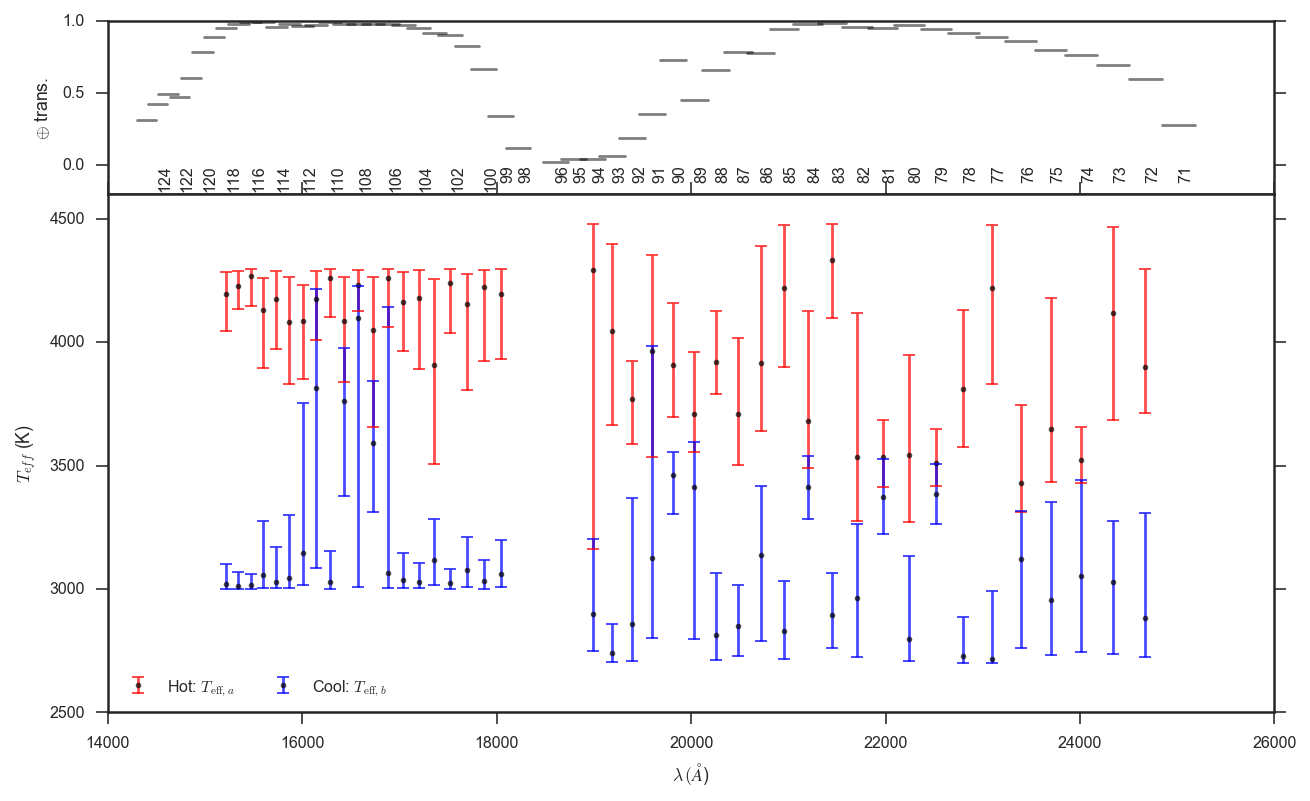

In [14]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

#ax.vlines(sf_dat2.wl_center, 2500, 5000, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.Teff_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.Teff_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.Teff_50p, 'go', alpha=0.5)

ax.errorbar(sf_dat4.wl_center, sf_dat4.Teff_50p, 
             yerr=(sf_dat4.Teff_50p-sf_dat4.Teff_05p,
                  sf_dat4.Teff_95p-sf_dat4.Teff_50p), ecolor='r', capthick=1,
            fmt='k.', alpha=0.7, label='Hot: $T_{\mathrm{eff}, a}$')
ax.errorbar(sf_dat4.wl_center, sf_dat4.Teff2_50p,
             yerr=(sf_dat4.Teff2_50p-sf_dat4.Teff2_05p, 
                  sf_dat4.Teff2_95p-sf_dat4.Teff2_50p), ecolor='b', capthick=1,
            fmt='k.', alpha=0.7, label='Cool: $T_{\mathrm{eff}, b}$')


ax.set_ylim(2500, 4600)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(ncol=2, loc='lower left')
plt.savefig('../results/fig/LkCa4_HK_mixTeff_by_order.pdf', bbox_inches='tight')

In [15]:
sns.set_context('talk')

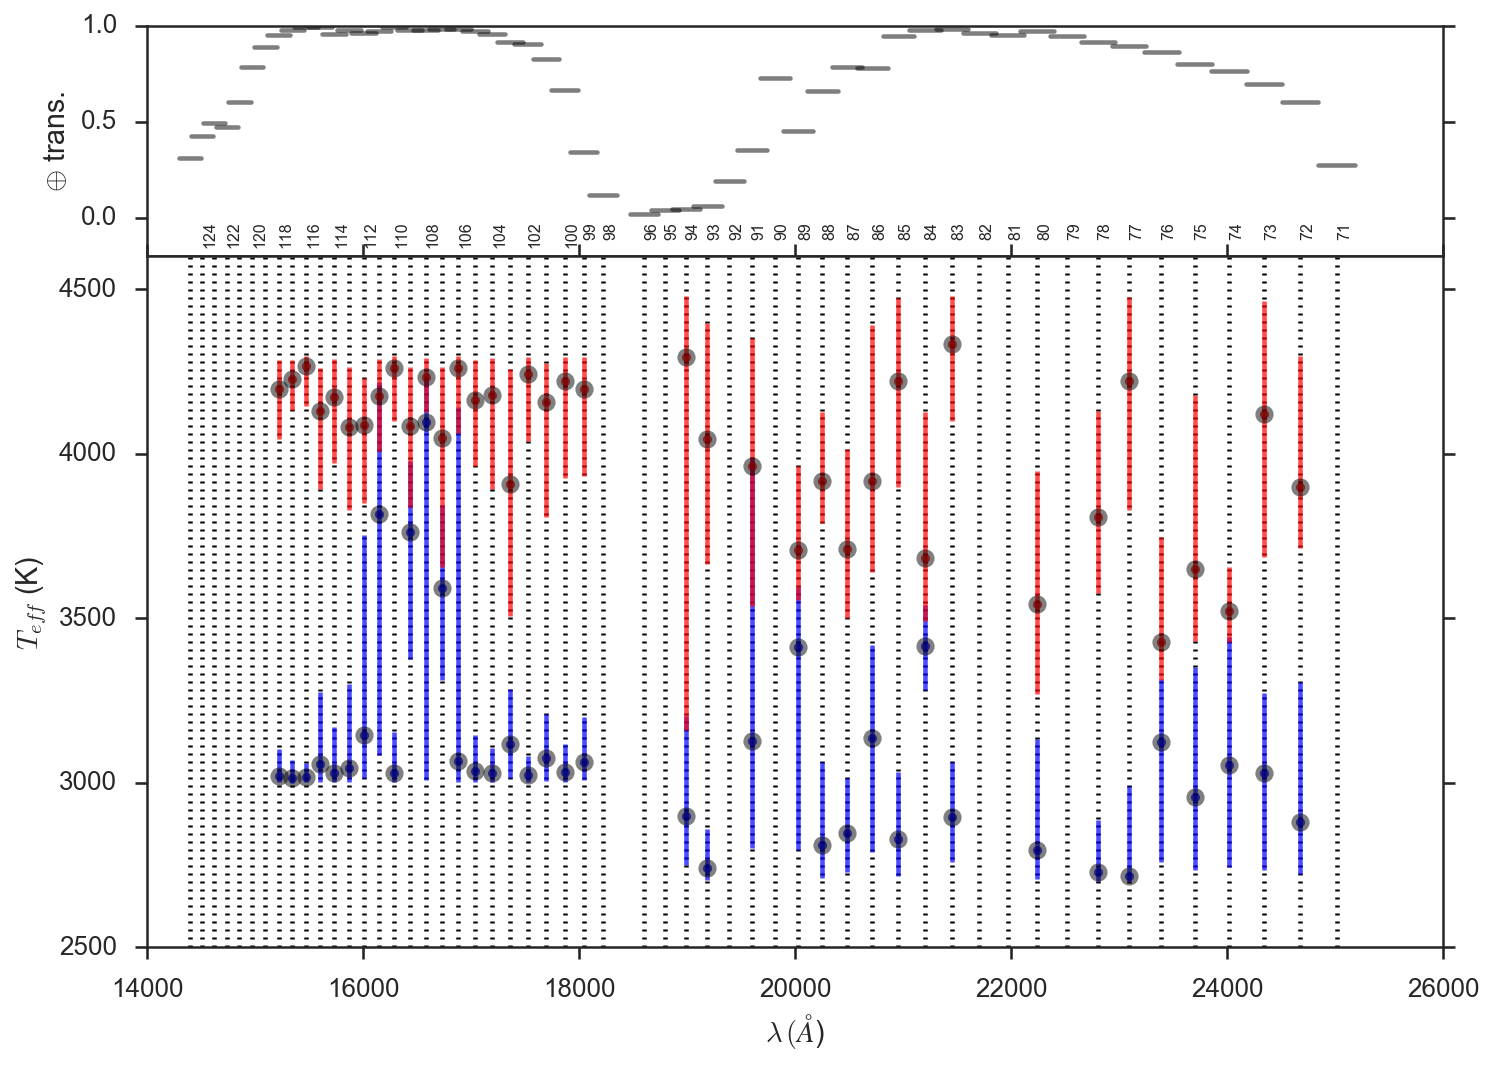

In [16]:
#plt.subplot(211)
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 2500, 5000, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.Teff_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.Teff_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.Teff_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4_cln.wl_center, sf_dat4_cln.Teff2_50p, 
             yerr=(sf_dat4_cln.Teff2_50p-sf_dat4_cln.Teff2_05p,
                  sf_dat4_cln.Teff2_95p-sf_dat4_cln.Teff2_50p),fmt='b.', alpha=0.7)
ax.errorbar(sf_dat4_cln.wl_center, sf_dat4_cln.Teff_50p, 
             yerr=(sf_dat4_cln.Teff_50p-sf_dat4_cln.Teff_05p,
                  sf_dat4_cln.Teff_95p-sf_dat4_cln.Teff_50p),fmt='r.', alpha=0.7)
ax.plot(sf_dat4_cln.wl_center, sf_dat4_cln.Teff_50p, 'ko', alpha=0.5)
ax.plot(sf_dat4_cln.wl_center, sf_dat4_cln.Teff2_50p, 'ko', alpha=0.5)

ax.set_ylim(2500, 4600)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
#ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixTeff_by_order.pdf', bbox_inches='tight')
plt.savefig('../results/coolstars19/LkCa4_HK_mixTeff_poster.pdf', bbox_inches='tight')

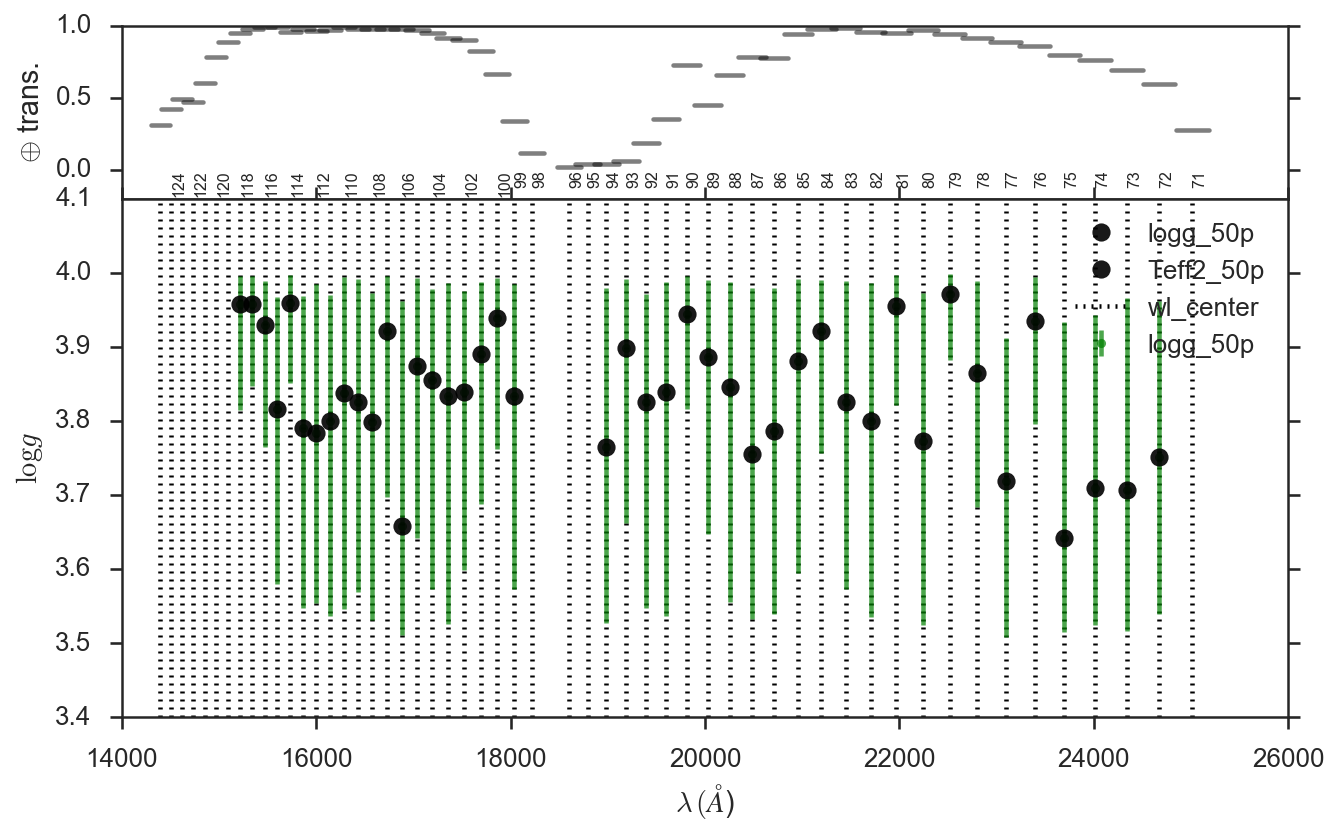

In [17]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 3.4, 4.1, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.logg_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.logg_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.logg_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.logg_50p, 
             yerr=(sf_dat4.logg_50p-sf_dat4.logg_05p,
                  sf_dat4.logg_95p-sf_dat4.logg_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.logg_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(3.4, 4.1)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$\log{g}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixlogg_by_order.pdf', bbox_inches='tight')

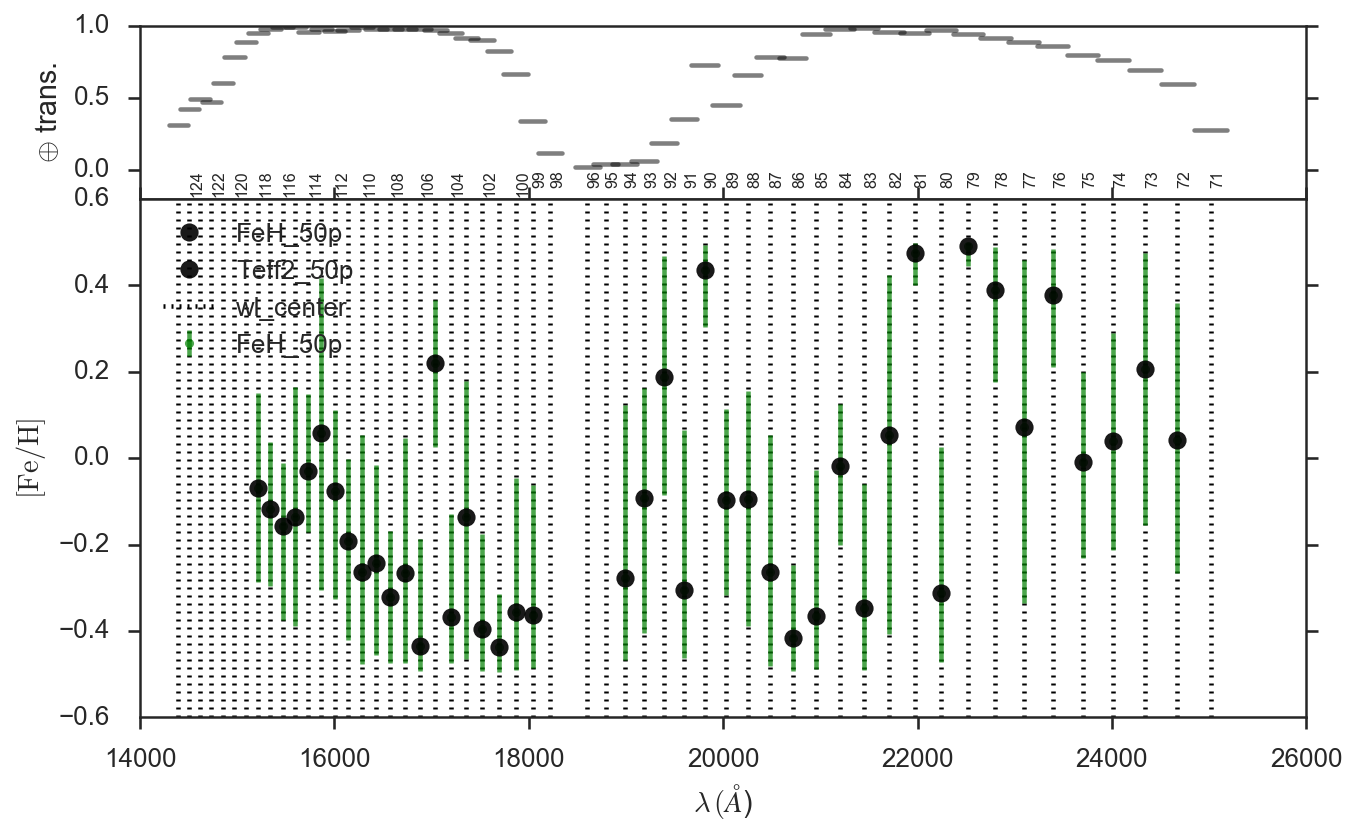

In [18]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, -0.6, 0.6, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.FeH_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.FeH_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.FeH_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.FeH_50p, 
             yerr=(sf_dat4.FeH_50p-sf_dat4.FeH_05p,
                  sf_dat4.FeH_95p-sf_dat4.FeH_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.FeH_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(-0.6, 0.6)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$[\mathrm{Fe}/\mathrm{H}]$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixFeH_by_order.pdf', bbox_inches='tight')

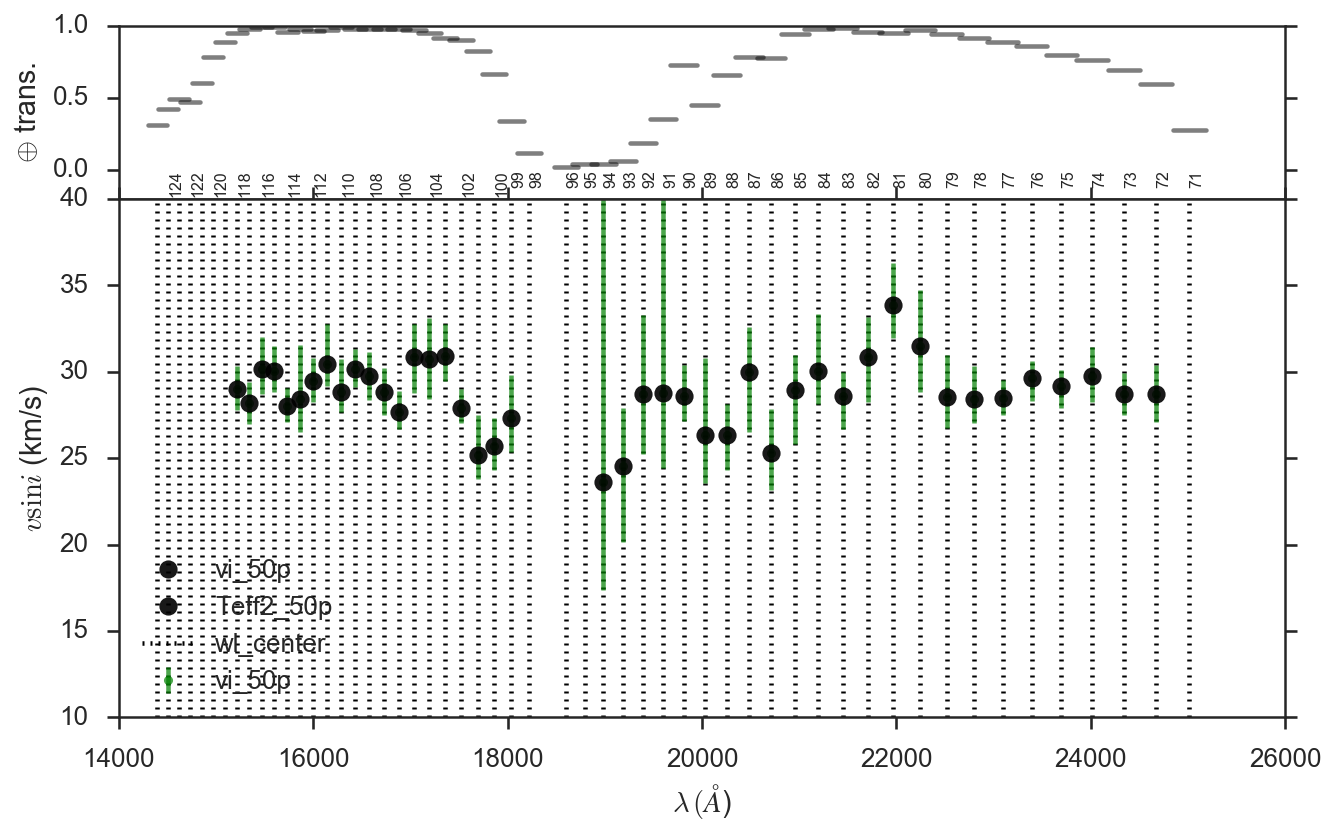

In [19]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 10, 40, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.vi_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.vi_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.vi_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.vi_50p, 
             yerr=(sf_dat4.vi_50p-sf_dat4.vi_05p,
                  sf_dat4.vi_95p-sf_dat4.vi_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.vi_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(10, 40)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$v \sin{i}$ (km/s)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixvi_by_order.pdf', bbox_inches='tight')

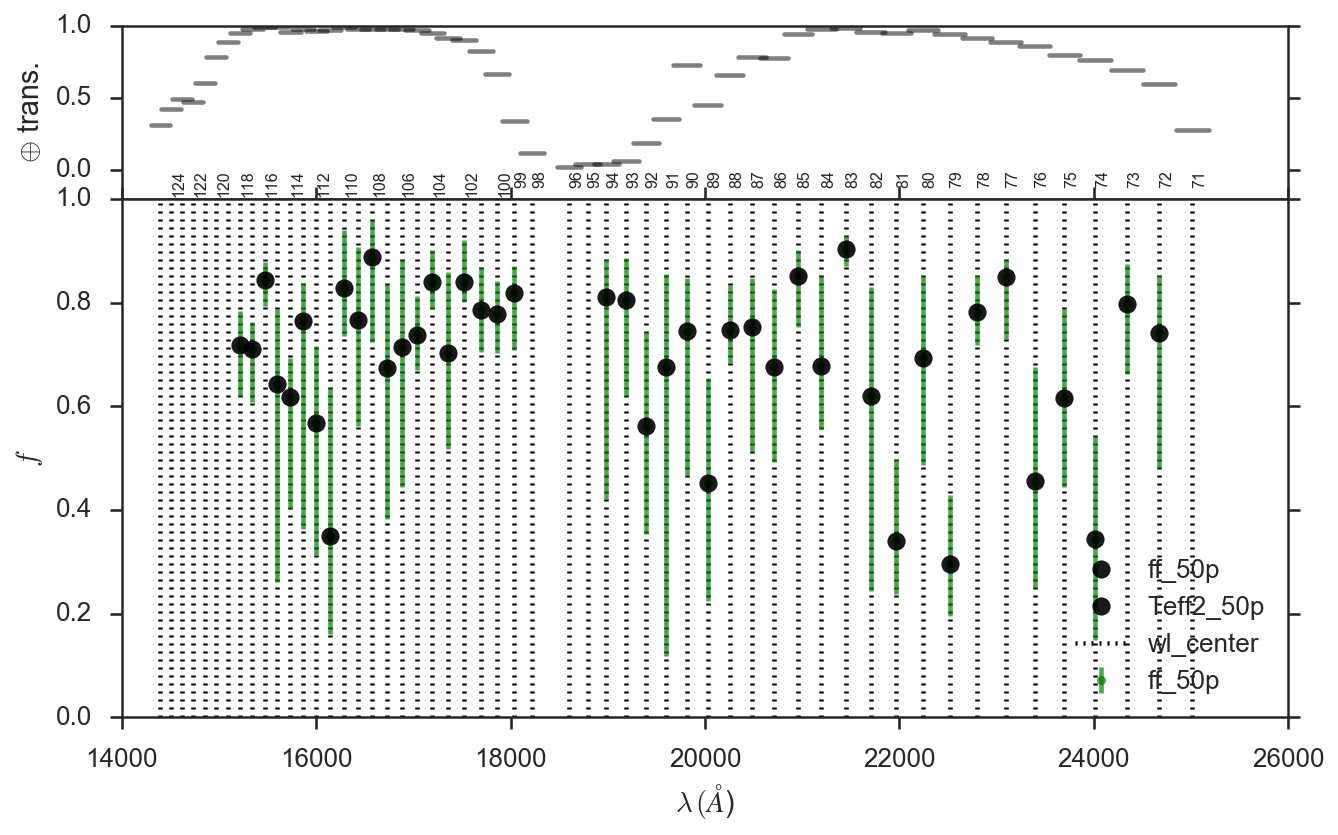

In [20]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 0, 1, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.ff_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.ff_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.ff_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.ff_50p, 
             yerr=(sf_dat4.ff_50p-sf_dat4.ff_05p,
                  sf_dat4.ff_95p-sf_dat4.ff_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.ff_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(0, 1)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$f$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixff_by_order.pdf', bbox_inches='tight')

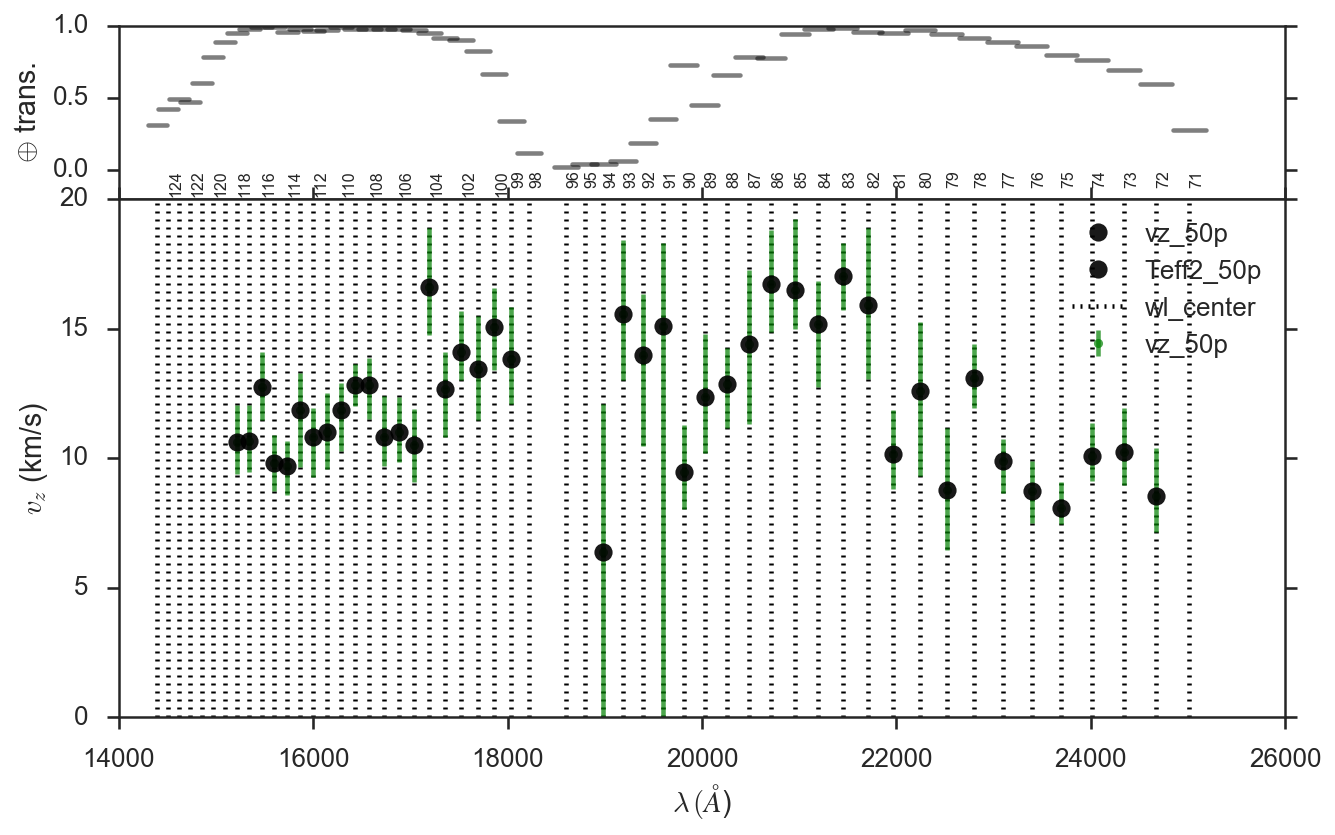

In [21]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 1
    if sf_dat.m_val[i] > 100:
        print_every = 2
    if (sf_dat.number.values[i] % print_every) == 0:
        ax1.text(sf_dat.wl_center[i], -0.08, '{}'.format(sf_dat.m_val.values[i]),
                 fontsize=8, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.vlines(sf_dat2.wl_center, 0, 20, linestyles='dotted')
#ax.plot(sf_dat2.wl_center, sf_dat2.vz_50p, 'bs', alpha=0.5)
#ax.plot(sf_dat.wl_center, sf_dat.vz_50p, 'ro', alpha=0.5)
#ax.plot(sf_dat3.wl_center, sf_dat3.vz_50p, 'go', alpha=0.5)
ax.errorbar(sf_dat4.wl_center, sf_dat4.vz_50p, 
             yerr=(sf_dat4.vz_50p-sf_dat4.vz_05p,
                  sf_dat4.vz_95p-sf_dat4.vz_50p),fmt='g.', alpha=0.7)
ax.plot(sf_dat4.wl_center, sf_dat4.vz_50p, 'ko', alpha=0.9)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'ko', alpha=0.9)

ax.set_ylim(0, 20)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$v_z$ (km/s)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')
#plt.savefig('LkCa4_HK_mixvz_by_order.pdf', bbox_inches='tight')

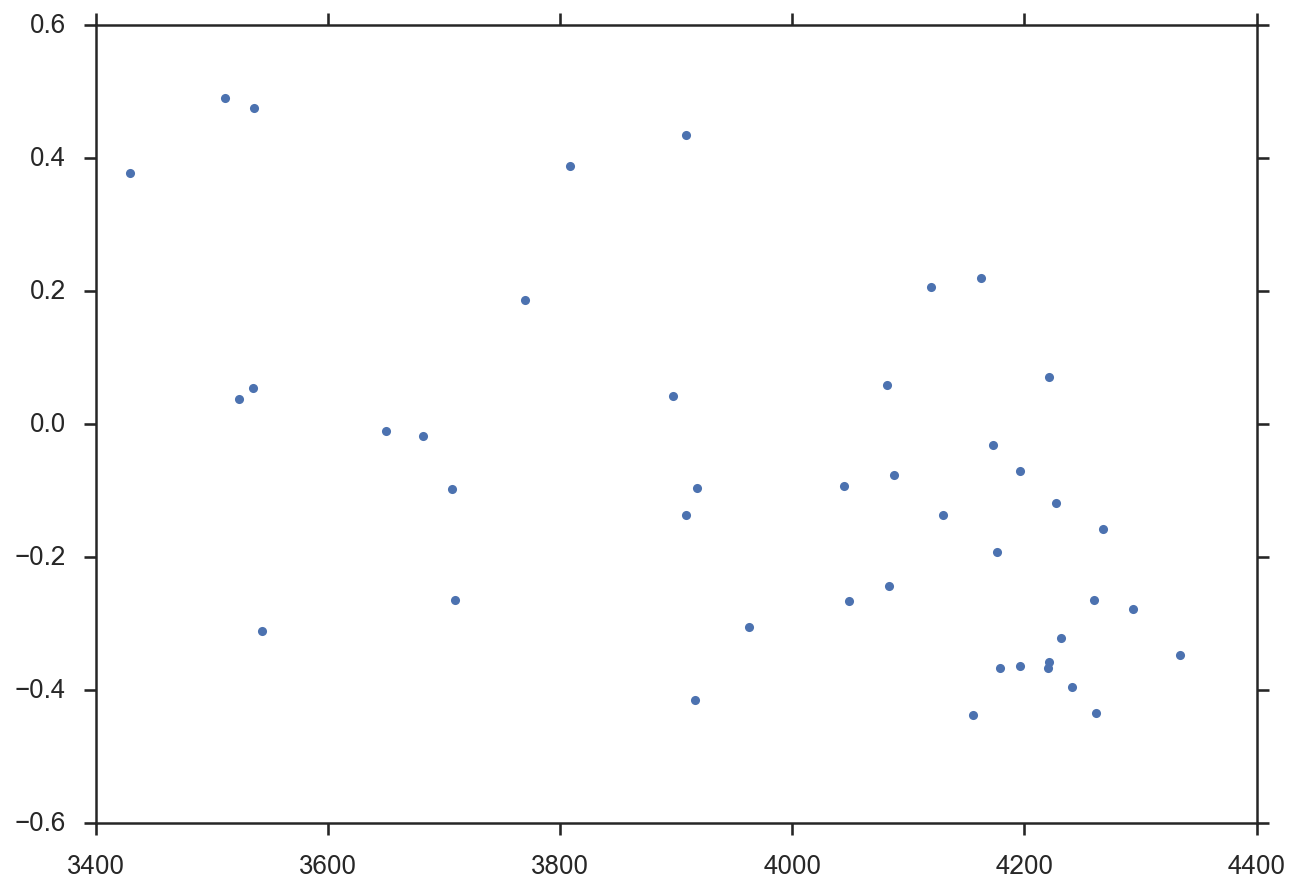

In [22]:
plt.plot(sf_dat4.Teff_50p, sf_dat4.FeH_50p, '.')

In [23]:
sns.set_context('paper', font_scale=1)

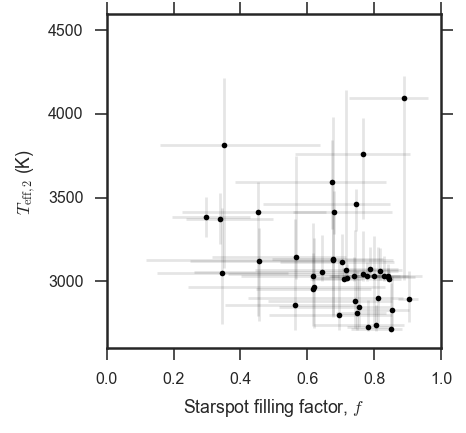

In [24]:
plt.figure(figsize=(3, 3))
plt.plot(sf_dat4.ff_50p, sf_dat4.Teff2_50p, 'k.', alpha=1.0)
plt.errorbar(sf_dat4.ff_50p, sf_dat4.Teff2_50p, 
             yerr=(sf_dat4.Teff2_50p-sf_dat4.Teff2_05p,
                  sf_dat4.Teff2_95p-sf_dat4.Teff2_50p),
             xerr=(sf_dat4.ff_50p-sf_dat4.ff_05p,
                  sf_dat4.ff_95p-sf_dat4.ff_50p), fmt='k.', alpha=0.1)
#plt.plot(sf_dat4.ff_50p, sf_dat4.Teff_05p, 'rv', alpha=0.5)
#plt.plot(sf_dat4.ff_50p, sf_dat4.Teff_95p, 'rs', alpha=0.5)
bi = sf_dat4.Teff2_50p > 3400
subset = sf_dat4[bi]

subset.reset_index(inplace=True)

#for i in range(len(subset)):
#    plt.text(subset.ff_50p[i]+0.02, subset.Teff2_50p[i]+10, "m={}".format(subset.m_val[i]))

plt.ylabel('$T_{\mathrm{eff},2}$ (K)')
plt.xlabel('Starspot filling factor, $f$')
plt.xlim(0,1)
plt.ylim(2600,4600)
plt.savefig('../document/figures/LkCa4_fill_vs_Teff2.pdf',bbox_inches='tight')
#plt.savefig('../results/coolstars19/LkCa4_starspot_poster.pdf', bbox_inches='tight')

(2600, 4600)

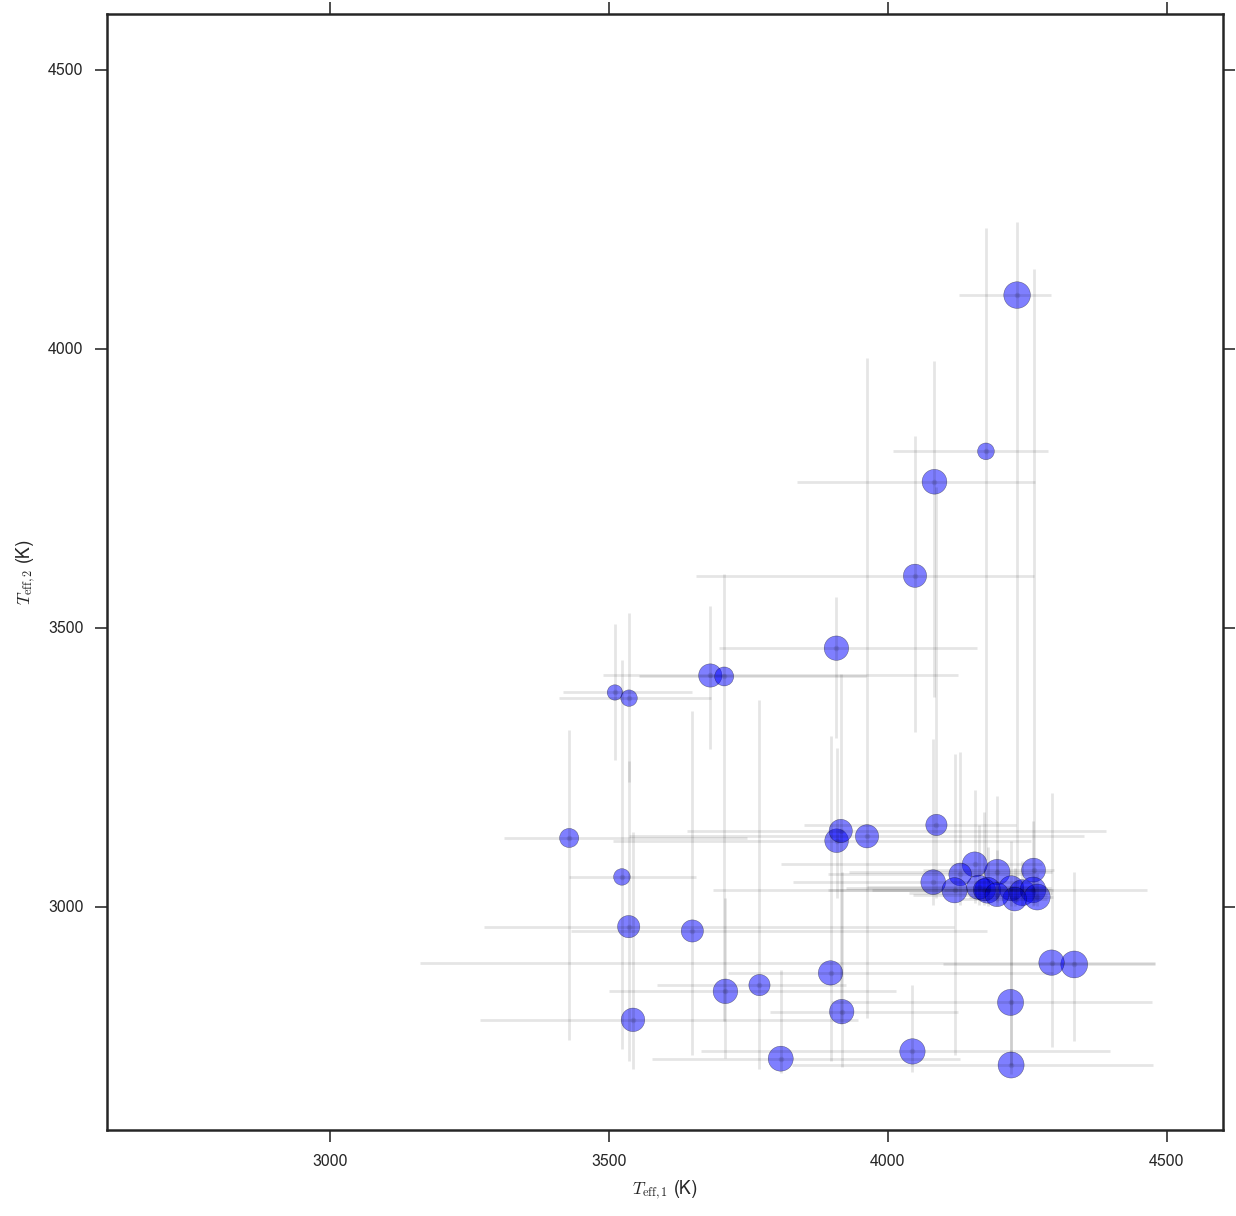

In [58]:
plt.figure(figsize=(10, 10))
plt.scatter(sf_dat4.Teff_50p, sf_dat4.Teff2_50p, s=sf_dat4.ff_50p*200.0, alpha=0.5)
plt.errorbar(sf_dat4.Teff_50p, sf_dat4.Teff2_50p, 
             yerr=(sf_dat4.Teff2_50p-sf_dat4.Teff2_05p,
                  sf_dat4.Teff2_95p-sf_dat4.Teff2_50p),
             xerr=(sf_dat4.Teff_50p-sf_dat4.Teff_05p,
                  sf_dat4.Teff_95p-sf_dat4.Teff_50p), fmt='k.', alpha=0.1)

plt.ylabel('$T_{\mathrm{eff},2}$ (K)')
plt.xlabel('$T_{\mathrm{eff},1}$ (K)')
plt.xlim(2600,4600)
plt.ylim(2600,4600)

In [25]:
dict(rug=True)

{'rug': True}

In [26]:
sns.set_context('paper')

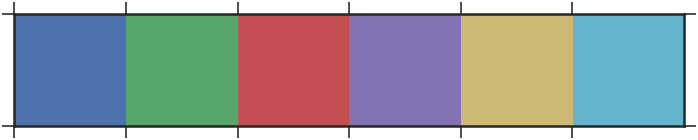

In [27]:
sns.palplot(sns.color_palette())

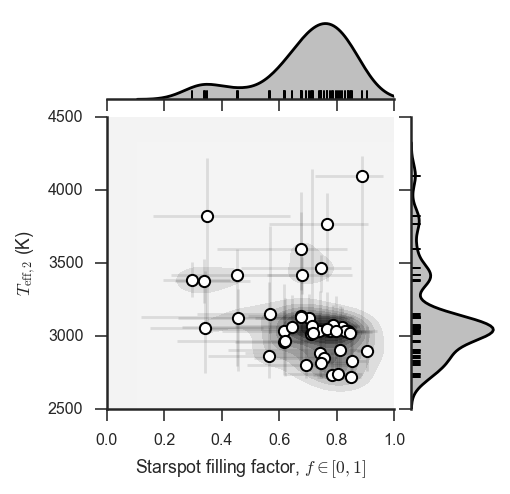

In [28]:
plt.figure(figsize=(3,3))
ax = sns.jointplot(sf_dat4.ff_50p, sf_dat4.Teff2_50p, kind='kde', stat_func=None, size=3.5, ratio=3, color='k')
ax.set_axis_labels('Starspot filling factor, $f \in [0,1]$', '$T_{\mathrm{eff},2}$ (K)')

ax.ax_joint.set_xlim(0,1)
ax.ax_joint.set_ylim(2500,4500)
ax.ax_joint.set_axis_bgcolor('#F3F3F3')

ax.ax_joint.errorbar(sf_dat4.ff_50p, sf_dat4.Teff2_50p, 
             yerr=(sf_dat4.Teff2_50p-sf_dat4.Teff2_05p,
                  sf_dat4.Teff2_95p-sf_dat4.Teff2_50p),
             xerr=(sf_dat4.ff_50p-sf_dat4.ff_05p,
                  sf_dat4.ff_95p-sf_dat4.ff_50p), fmt='k.', alpha=0.1)
ax.ax_joint.plot(sf_dat4.ff_50p, sf_dat4.Teff2_50p, 'wo', alpha=1.0, 
                 markeredgecolor='black',markeredgewidth=1)


sns.distplot(sf_dat4.ff_50p.values, hist=False, rug=True, kde=False, ax=ax.ax_marg_x, axlabel=None,
             rug_kws=dict(height=0.1, c='k'))
sns.distplot(sf_dat4.Teff2_50p.values, hist=False, rug=True, kde=False, ax=ax.ax_marg_y,
             rug_kws=dict(height=0.1, c='k'), vertical=True)

plt.savefig('../document/figures/LkCa4_fill_vs_Teff2_joint.pdf',bbox_inches='tight')
#plt.savefig('../results/coolstars19/LkCa4_starspot_poster.pdf', bbox_inches='tight')

In [29]:
sns.set_context('paper', font_scale=1)

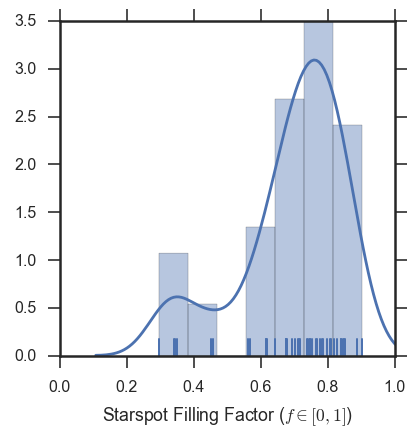

In [30]:
plt.figure(figsize=(3,3))
sns.distplot(sf_dat4.ff_50p.dropna(), rug=True, axlabel="Starspot Filling Factor ($f \in [0,1]$)")
plt.xlim(0,1)
plt.savefig('../document/figures/starspot_fill.pdf')

In [31]:
sf_dat4.ff_50p.dropna().median(), sf_dat4.ff_50p.dropna().std()

(0.7381335064104659, 0.1550235786846665)

(0, 20)

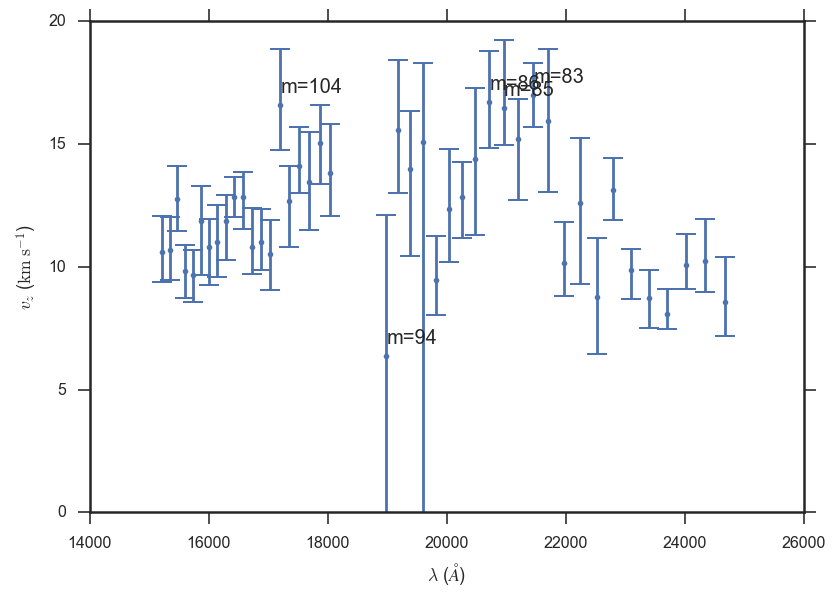

In [32]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.vz_50p, 
             (sf_dat4.vz_50p-sf_dat4.vz_05p, sf_dat4.vz_95p-sf_dat4.vz_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)

bi = (sf_dat4.vz_50p > 16) | (sf_dat4.vz_50p < 8)
subset = sf_dat4[bi]

subset.reset_index(inplace=True)

for i in range(len(subset)):
    plt.text(subset.wl_center[i]+10, subset.vz_50p[i]+0.5, "m={}".format(subset.m_val[i]))

plt.ylabel('$v_{z}$ ($\mathrm{km \; s}^{-1}$)')
plt.xlabel('$\lambda$ ($\AA$)')
plt.ylim(0, 20)

In [33]:
import astropy.constants as c

In [34]:
v = c.c/45000

In [35]:
import astropy.units as u

In [36]:
v.to(u.km/u.s)

<Quantity 6.662054622222222 km / s>

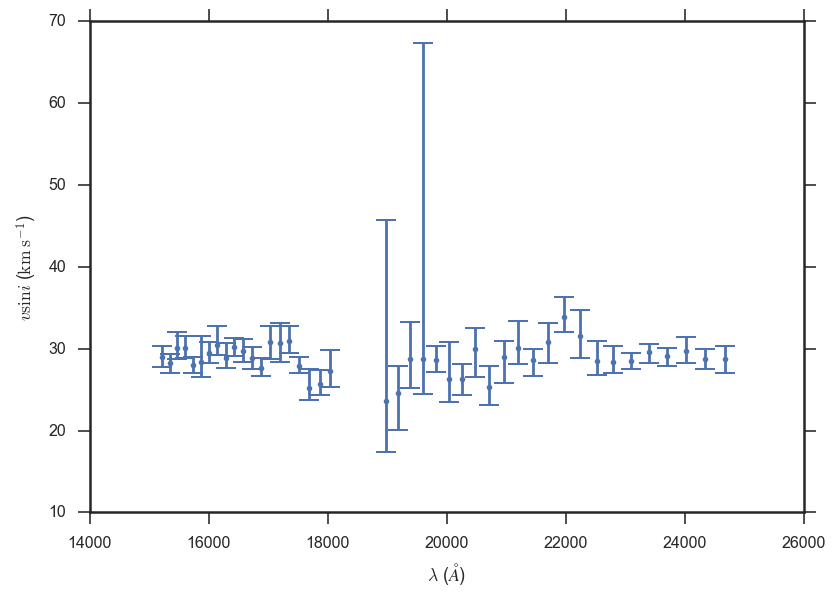

In [37]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.vi_50p, 
             (sf_dat4.vi_50p-sf_dat4.vi_05p, sf_dat4.vi_95p-sf_dat4.vi_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)
plt.ylabel('$v\sin{i}$ ($\mathrm{km \; s}^{-1}$)')
plt.xlabel('$\lambda$ ($\AA$)')

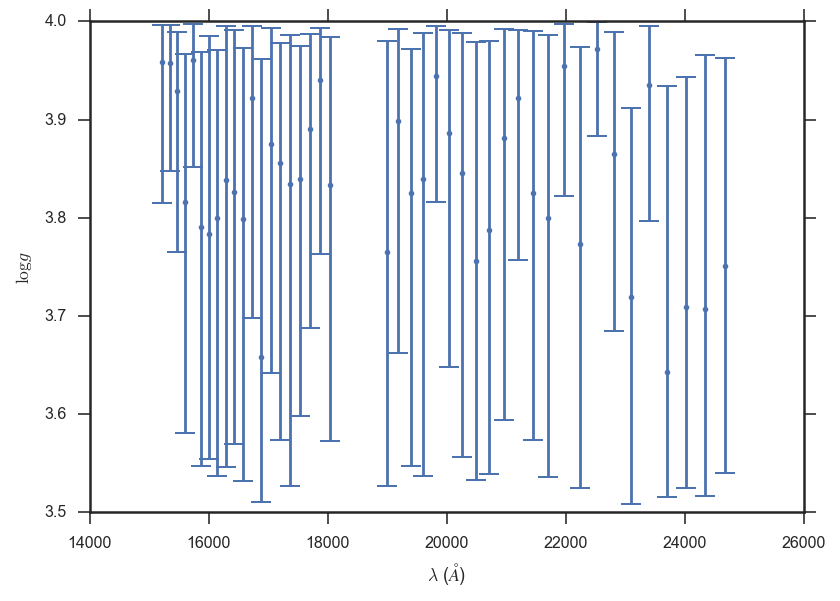

In [38]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.logg_50p, 
             (sf_dat4.logg_50p-sf_dat4.logg_05p, sf_dat4.logg_95p-sf_dat4.logg_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)
plt.ylabel('$\log{g}$')
plt.xlabel('$\lambda$ ($\AA$)')

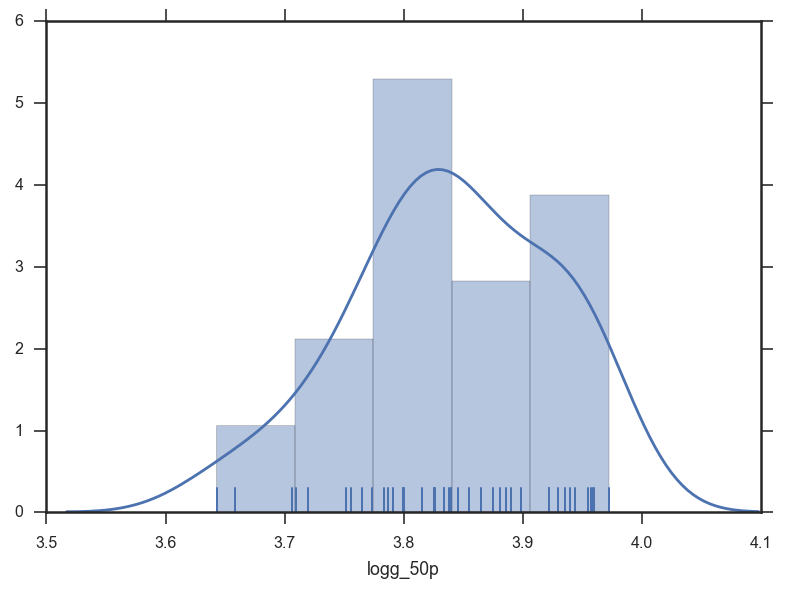

In [39]:
sns.distplot(sf_dat4.logg_50p[sf_dat4.logg_50p == sf_dat4.logg_50p], rug=True)

In [40]:
gi = sf_dat4.logg_50p == sf_dat4.logg_50p

In [41]:
vals = sf_dat4.logg_50p[gi]

In [42]:
logg = np.average(sf_dat4.logg_50p[gi], weights=sf_dat4.logg_95p[gi]-sf_dat4.logg_05p[gi])

In [43]:
feh = np.average(sf_dat4.FeH_50p[gi], weights=sf_dat4.FeH_95p[gi]-sf_dat4.FeH_05p[gi])

In [44]:
logg

3.819737611584674

In [45]:
feh

-0.10559743818742225

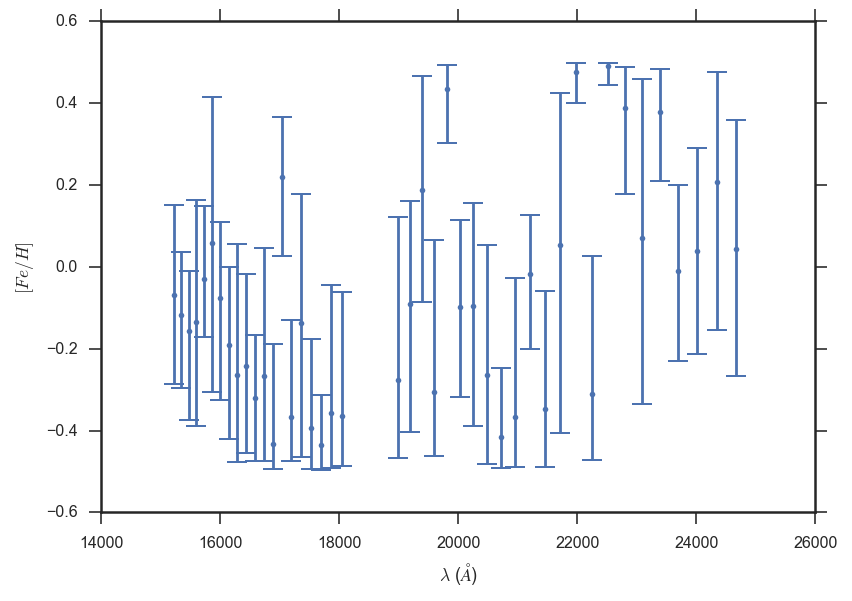

In [46]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.FeH_50p, 
             (sf_dat4.FeH_50p-sf_dat4.FeH_05p, sf_dat4.FeH_95p-sf_dat4.FeH_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)
plt.ylabel('$[Fe/H]$')
plt.xlabel('$\lambda$ ($\AA$)')

The end for now.  